<a href="https://colab.research.google.com/github/bezerraluis/Luis_Paulo_Portf/blob/master/Projeto_de_an%C3%A1lise_de_pre%C3%A7o_de_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de análise de preço de carros

O negócio de revenda de carros usados é extremamente competitivo, pensando nisso, uma gigante do ramo de revenda de automóveis quer desenvolver um algoritmo que auxilie ele na predição do valor que seus concorrentes irão cobrar em veículos além de ter uma estimativa do preço seu próprio estoque.

Crie uma solução comercial que resolva este problema.

Existe um conjunto disponível em: https://www.kaggle.com/hellbuoy/car-price-prediction 

# Enquadre o problema e veja a imagem geral.

1. Defina o objetivo em termos de negócios.
2. Como sua solução será usada?
3. Quais são as soluções / soluções alternativas atuais (se houver)?
4. Como você deve enquadrar esse problema (supervisionado / não supervisionado, online / offline, etc.)?
5. Como o desempenho deve ser medido?
6. A medida de desempenho está alinhada com o objetivo do negócio?
7. Qual seria o desempenho mínimo necessário para alcançar o objetivo do negócio?
8. Quais são os problemas comparáveis? Você pode reutilizar experiências ou ferramentas?
9. Existe experiência humana disponível?
10. Como você resolveria o problema manualmente?
11. Liste as suposições que você (ou outras pessoas) fizeram até agora.
12. Verifique as suposições, se possível.

Fazer a predição do VALOR de um veículo

Regressor

Supervisionado

MAE, MSE e RMSE

90%

Caso eu resolve-se manualmente, eu utilizaria a tabela FIPE como parâmetro

# Obtenha os dados

In [1]:
import pandas as pd

df = pd.read_csv("CarPrice_Assignment.csv")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Explore os dados para obter insights.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe().columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


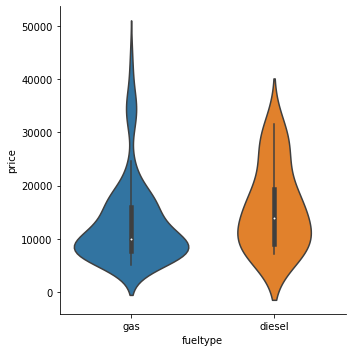

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.catplot(x="fueltype", y="price", data=df, kind="violin")

plt.savefig("abc.png")

In [6]:
df_categoricos = df.drop(["car_ID",
                          "symboling",
                          "wheelbase",
                          "carlength",
                          "carwidth",
                          "carheight",
                          "curbweight",
                          "enginesize",
                          "boreratio",
                          "stroke",
                          "compressionratio",
                          "horsepower",
                          "peakrpm",
                          "citympg",
                          "highwaympg"], axis=1)

df_categoricos.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


In [7]:
df_numericos = df.loc[:,['car_ID', 
                       'symboling', 
                       'wheelbase', 
                       'carlength', 
                       'carwidth',
                       'carheight', 
                       'curbweight', 
                       'enginesize', 
                       'boreratio', 
                       'stroke',
                       'compressionratio', 
                       'horsepower', 
                       'peakrpm', 
                       'citympg', 
                       'highwaympg',
                        'price']]
df_numericos.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


## Análise Atributos Categóricos

In [8]:
df_categoricos.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,17450.0


In [9]:
df["carbody"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

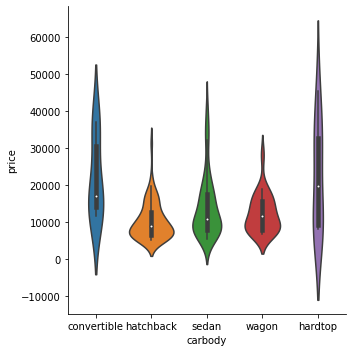

In [10]:
sns.catplot(x="carbody", y="price", data=df_categoricos, kind="violin")

plt.savefig("carbody.png")

## Análise de dados Numéricos

In [11]:
df_numericos.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df_menor = df[["enginesize","stroke","peakrpm","horsepower", "price"]]
df_menor.head()

,enginesize,stroke,peakrpm,horsepower,price
0,130,2.68,5000,111,13495.0
1,130,2.68,5000,111,16500.0
2,152,3.47,5000,154,16500.0
3,109,3.40,5500,102,13950.0
4,136,3.40,5500,115,17450.0


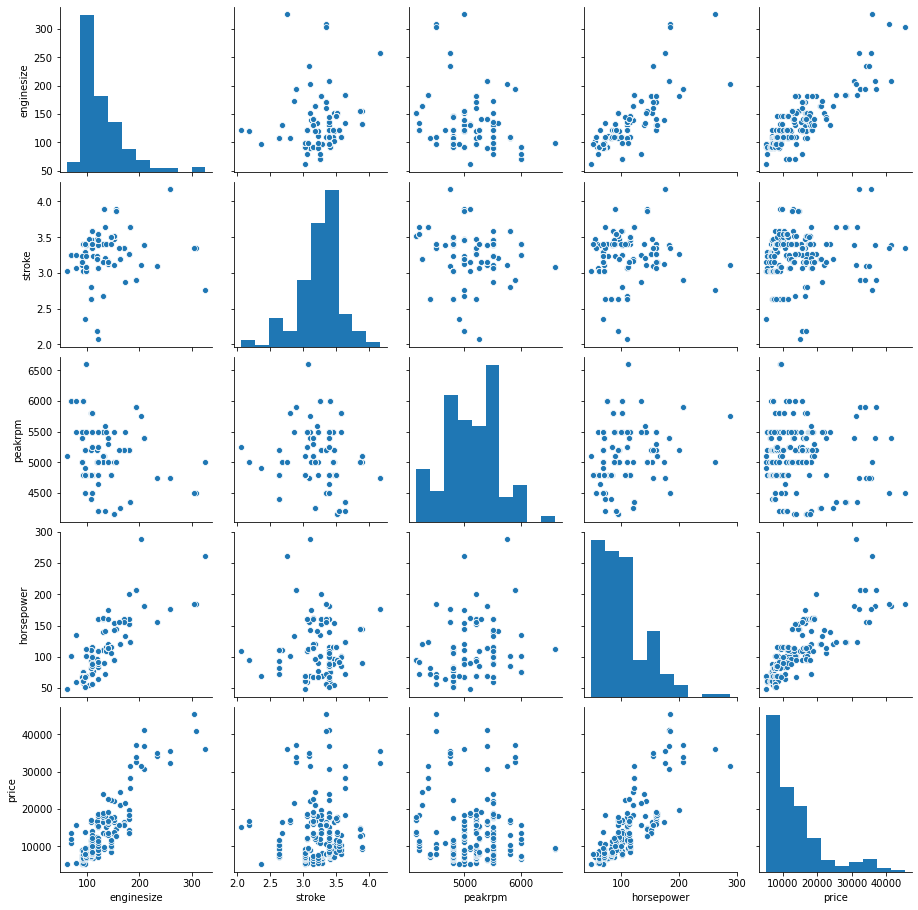

In [13]:
sns.pairplot(df_menor);

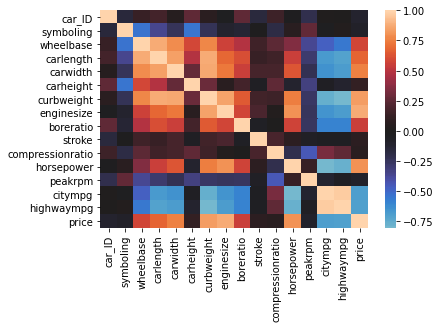

In [48]:
sns.heatmap(df_numericos.corr(),center=0)

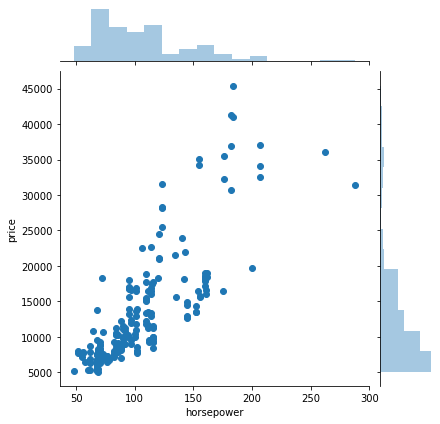

In [14]:
sns.jointplot(x="horsepower",y="price",data=df_numericos)

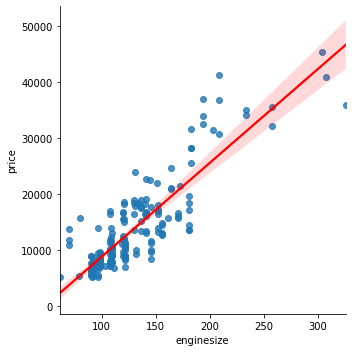

In [15]:
sns.lmplot(x='enginesize',y='price',data=df_numericos, line_kws={"color":"red"});

# Preparar os dados para melhor expor os padrões de dados subjacentes aos algoritmos de Machine Learning.

In [16]:
df_prep = df.copy()

X = df_prep.drop(["stroke", "peakrpm", "car_ID", "price"],axis=1)
y = df_prep["price"].values

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [18]:
# from sklearn.preprocessing import LabelEncoder

# enc_symboling = LabelEncoder()
# df_prep["symboling"] = enc_symboling.fit_transform(df_prep["symboling"])

# df_prep.head()

In [19]:
colunas_numericas = X.describe().columns
colunas_numericas

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'compressionratio',
       'horsepower', 'citympg', 'highwaympg'],
      dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[colunas_numericas] = pd.DataFrame(scaler.fit_transform(X[colunas_numericas]), 
                                    columns=colunas_numericas)
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg
0,1.743470,alfa-romero giulia,gas,std,two,convertible,rwd,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,-0.288349,0.174483,-0.646553,-0.546059
1,1.743470,alfa-romero stelvio,gas,std,two,convertible,rwd,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,-0.288349,0.174483,-0.646553,-0.546059
2,0.133509,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,ohcv,six,0.604046,mpfi,-2.404880,-0.288349,1.264536,-0.953012,-0.691627
3,0.938490,audi 100 ls,gas,std,four,sedan,fwd,front,0.173698,0.207256,0.136542,0.235942,-0.420797,ohc,four,-0.431076,mpfi,-0.517266,-0.035973,-0.053668,-0.186865,-0.109354
4,0.938490,audi 100ls,gas,std,four,sedan,4wd,front,0.107110,0.207256,0.230001,0.235942,0.516807,ohc,five,0.218885,mpfi,-0.517266,-0.540725,0.275883,-1.106241,-1.273900


In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

X = encoder.fit_transform(X)
X

<205x815 sparse matrix of type '<class 'numpy.float64'>'
	with 4510 stored elements in Compressed Sparse Row format>

# Explorar vários  modelos diferentes e fazer uma lista curta dos melhores.

In [22]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Intânciamento
lin_reg = LinearRegression()
svr_reg = SVR(gamma="auto")
lsvr_reg = LinearSVR()
elas_reg = ElasticNet()
las_reg = Lasso()
rid_reg = Ridge()
dtr_reg = DecisionTreeRegressor()
rnd_reg = RandomForestRegressor(n_estimators=100)

#Treino
lin_reg.fit(x_treino, y_treino)
svr_reg.fit(x_treino, y_treino)
lsvr_reg.fit(x_treino, y_treino)
elas_reg.fit(x_treino, y_treino)
las_reg.fit(x_treino, y_treino)
rid_reg.fit(x_treino, y_treino)
dtr_reg.fit(x_treino, y_treino)
rnd_reg.fit(x_treino, y_treino)

#Medição erro
mede_erro(lin_reg, x_teste, y_teste)
mede_erro(svr_reg, x_teste, y_teste)
mede_erro(lsvr_reg, x_teste, y_teste)
mede_erro(elas_reg, x_teste, y_teste)
mede_erro(las_reg, x_teste, y_teste)
mede_erro(rid_reg, x_teste, y_teste)
mede_erro(dtr_reg, x_teste, y_teste)
mede_erro(rnd_reg, x_teste, y_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3509579.7065719636, tolerance: 940427.5878420762
  max_iter, tol, rng, random, positive)


LinearRegression
MAE:  2139.330044975452
MSE:  11297501.468149297
RMSE:  127633539422835.52

SVR
MAE:  5517.975397826444
MSE:  68134361.37608892
RMSE:  4642291200127477.0

LinearSVR
MAE:  12385.435483870968
MSE:  212884951.71774194
RMSE:  4.532000266786531e+16

ElasticNet
MAE:  3131.8697009829298
MSE:  22224530.188045494
RMSE:  493929742079345.5

Lasso
MAE:  2301.2405733548653
MSE:  12833330.474381305
RMSE:  164694371064683.9

Ridge
MAE:  2080.087938738259
MSE:  10792155.51190004
RMSE:  116470620593034.4

DecisionTreeRegressor
MAE:  2426.8064516129034
MSE:  16678917.60483871
RMSE:  278186292468998.66

RandomForestRegressor
MAE:  2125.189622258065
MSE:  13380811.76237232
RMSE:  179046123420041.44



In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import square

def mede_erro(modelo, X, y):
    predicoes = modelo.predict(X)
    
    mae = mean_absolute_error(y, predicoes)
    mse = mean_squared_error(y, predicoes)
    rmse = square(mse)
    
    print(modelo.__class__.__name__)
    print("MAE: ",mae)
    print("MSE: ",mse)
    print("RMSE: ",rmse)
    
    print("")

# Ajuste seus modelos e combine-os em uma ótima solução.

1. Use os parâmetros para melhorar seu modelo
2. Quando estiver confiante sobre seu modelo final, meça seu desempenho no conjunto de testes para estimar o erro de generalização.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Ridge
ridge_params = {
    "alpha":[1,0.1,0.01,0.001,0.0001],
    "solver":['auto', 'sag']
}

grid = GridSearchCV(Ridge(), ridge_params)
grid.fit(x_treino,y_treino)
ridge_melhor = grid.best_estimator_

In [29]:
# DecisionTreeRegressor
dtree_params = {
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],
    "max_features":['auto',1,2,3,4,5,6]
}

grid = GridSearchCV(DecisionTreeRegressor(), dtree_params)
grid.fit(x_treino,y_treino)
dtre_melhor = grid.best_estimator_

In [30]:
# RandomForest
dtree_params = {
    "max_depth":[2,5,6],
    "n_estimators":[10,100,200]
}

grid = GridSearchCV(RandomForestRegressor(), dtree_params)
grid.fit(x_treino,y_treino)
rnd_melhor = grid.best_estimator_

# Apresente sua solução

**Testando StackingRegressor , com os parametros do GridSearchCV**

In [ ]:
from mlxtend.regressor import StackingRegressor

#Stack
clf_stk = StackingRegressor(regressors=[rnd_melhor, dtre_melhor], 
                          meta_regressor=ridge_melhor)

#Treino
clf_stk.fit(x_treino,y_treino)

#Predicoes
clf_stk.predict(x_teste)

In [33]:
mede_erro(clf_stk, x_teste, y_teste)

StackingRegressor
MAE:  2490.3733882681727
MSE:  21489833.085315272
RMSE:  461812926034710.94



**Testando AdaBoostRegressor  sem os parametros do GridSearchCV**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(RandomForestRegressor(max_depth=10), 
    n_estimators=200,
    learning_rate=0.5, 
    random_state=42, 
    loss = 'square')

ada_clf.fit(x_treino, y_treino)

#Predicoes

ada_clf.predict(x_teste)

In [79]:
mede_erro(ada_clf, x_teste, y_teste)

AdaBoostRegressor
MAE:  2114.6122677377166
MSE:  10533283.161969919
RMSE:  110950054170239.02



**Testando AdaBoostRegressor  com os parametros do GridSearchCV**

In [ ]:
ada_grid = AdaBoostRegressor(rnd_melhor, 
    n_estimators=500,
    learning_rate=0.6, 
    random_state=42, 
    loss = 'exponential')

ada_grid.fit(x_treino, y_treino)

ada_grid.predict(x_teste)

In [63]:
mede_erro(ada_grid, x_teste, y_teste)

AdaBoostRegressor
MAE:  2130.4058439915666
MSE:  10272881.980854945
RMSE:  105532104192574.22



**Testando GradientBoostingRegressor  sem os parametros os parametros de parada**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=50, 
                                 n_estimators=100, 
                                 learning_rate=0.1, 
                                 random_state=42)


gbrt.fit(x_treino, y_treino)

gbrt.predict(x_teste)

In [83]:
mede_erro(gbrt, x_teste, y_teste)

GradientBoostingRegressor
MAE:  2368.995921897848
MSE:  21081502.397384826
RMSE:  444429743330942.2



**Testando GradientBoostingRegressor  com  os parametros de parada**

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, 
                                 n_estimators=120,  
                                 random_state=42)

gbrt.fit(x_treino,y_treino)

errors = [mean_squared_error(y_teste, y)
          for y_pred in gbrt.staged_predict(x_teste)]
bst_n_estimators = np.argmin(errors) + 1


gbrt_best = GradientBoostingRegressor(max_depth=2,
                                      n_estimators=
                                      bst_n_estimators, 
                                      random_state=42)



gbrt_best.fit(x_treino, y_treino)



ValueError: ignored

# Inicie, monitore e mantenha seu sistema.

1. Prepare sua solução para produção (conecte as entradas de dados de produção, escreva testes unitários etc.).
2. Escreva o código de monitoramento para verificar o desempenho ao vivo do seu sistema em intervalos regulares e acionar alertas quando ele cair.
3. Cuidado com a degradação lenta também: os modelos tendem a "apodrecer" à medida que os dados evoluem.
4. Treine seus modelos regularmente com novos dados (automatize o máximo possível).